# Topic Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [4]:
df = pd.read_csv('endgame.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8723 entries, 0 to 8722
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  8723 non-null   object
 1   rating    8723 non-null   object
 2   helpful   8723 non-null   int64 
 3   total     8723 non-null   int64 
 4   date      8723 non-null   object
 5   title     8723 non-null   object
 6   review    8723 non-null   object
dtypes: int64(2), object(5)
memory usage: 477.2+ KB


In [6]:
df.count() 

username    8723
rating      8723
helpful     8723
total       8723
date        8723
title       8723
review      8723
dtype: int64

In [9]:
df.head(3)

,username,rating,helpful,total,date,title,review
0,raudafitriani,10,4501,6929,24 April 2019,An experience you'll gonna remember forever.\n,There is no way that I could describe my emoti...
1,theroo200182,6,3008,5289,26 April 2019,"Amazing, but the more I dwell on it the worse...","I have to say, my first reaction walking out o..."
2,domannsydney,4,10,12,3 May 2020,Infinity War was MUCH better\n,"Didn't live up to the hype even a little bit, ..."


In [11]:
df.shape

(8723, 7)

#### Check for nulls:

In [10]:
df.isna().sum()

username    0
rating      0
helpful     0
total       0
date        0
title       0
review      0
dtype: int64

# Cleaning (Tweet Content)

In [12]:
df_clean = df.copy()

<b>NLTK Cleaning</b>

In [13]:
import nltk
nltk.download('words')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Localuser\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


<b>Cleaning with RegEx</b>

In [14]:
df.head(2)

,username,rating,helpful,total,date,title,review
0,raudafitriani,10,4501,6929,24 April 2019,An experience you'll gonna remember forever.\n,There is no way that I could describe my emoti...
1,theroo200182,6,3008,5289,26 April 2019,"Amazing, but the more I dwell on it the worse...","I have to say, my first reaction walking out o..."


In [15]:
# Making conversions
# df['date'] = pd.to_datetime(df['date'])

# # Cleaning content
# df['text_lower'] = df['translatedtweets'].str.lower()
# df['text_no_num'] = df['text_lower'].str.replace(r'\d+', '')
# df['text_no_punc'] = df['text_no_num'].str.replace(r'[^\w\s]+', '')
# df['text_no_punc'] = df['text_no_punc'].str.replace('\n', '')
# df['text_no_punc'] = df['text_no_punc'].str.replace('_', '')
# df['translatedtweets'] = df['translatedtweets'].str.replace('$amp', 'and')
# df['text_no_punc'] = df['text_no_punc'].str.replace(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
# df = df.dropna(subset=['text_no_punc'])
# df['text_no_stopwords'] = [" ".join([word for word in i.split() if word not in stop_words]) for i in df["text_no_punc"]]

# Cleaning content
df['text_lower'] = df['review'].str.lower()
df['text_no_num'] = df['text_lower'].str.replace(r'\d+', '')
df['text_no_punc'] = df['text_no_num'].str.replace(r'[^\w\s]+', '')
df['text_no_punc'] = df['text_no_punc'].str.replace('\n', '')
df['text_no_punc'] = df['text_no_punc'].str.replace('_', '')
#df['translatedtweets'] = df['translatedtweets'].str.replace('$amp', 'and')
df['text_no_punc'] = df['text_no_punc'].str.replace(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
df = df.dropna(subset=['text_no_punc'])
df['text_no_stopwords'] = [" ".join([word for word in i.split() if word not in stop_words]) for i in df["text_no_punc"]]

<ipython-input-15-a78c72ef2966>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_no_num'] = df['text_lower'].str.replace(r'\d+', '')
<ipython-input-15-a78c72ef2966>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_no_punc'] = df['text_no_num'].str.replace(r'[^\w\s]+', '')
<ipython-input-15-a78c72ef2966>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_no_punc'] = df['text_no_punc'].str.replace(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')


In [17]:
df.head(2)

,username,rating,helpful,total,date,title,review,text_lower,text_no_num,text_no_punc,text_no_stopwords
0,raudafitriani,10,4501,6929,24 April 2019,An experience you'll gonna remember forever.\n,There is no way that I could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,way could describe emotions movie im totally s...
1,theroo200182,6,3008,5289,26 April 2019,"Amazing, but the more I dwell on it the worse...","I have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...",i have to say my first reaction walking out of...,say first reaction walking cinema great probab...


<b> Removing foreign words </b>

In [7]:
import spacy

In [8]:
nlp = spacy.load('en_core_web_sm')

In [20]:
# import spacy
# nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

In [38]:
#df = df.dropna(subset=['translatedtweets'])

In [18]:
def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])
        
df['text_lemma'] = df['text_no_stopwords'].apply(lemmatize)
df['text_no_foreign'] = df['text_lemma'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

In [19]:
df.head(2)

,username,rating,helpful,total,date,title,review,text_lower,text_no_num,text_no_punc,text_no_stopwords,text_lemma,text_no_foreign
0,raudafitriani,10,4501,6929,24 April 2019,An experience you'll gonna remember forever.\n,There is no way that I could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,way could describe emotions movie im totally s...,way could describe emotion movie -PRON- be tot...,way could describe emotion movie - - be totall...
1,theroo200182,6,3008,5289,26 April 2019,"Amazing, but the more I dwell on it the worse...","I have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...",i have to say my first reaction walking out of...,say first reaction walking cinema great probab...,say first reaction walk cinema great probably ...,say first reaction walk cinema great probably ...


<b> Removing additional words </b>

In [74]:
words_to_remove = ['-','movie','cinema','avengers','like','superhero','to','do','not','be','go','though','film','-_-','good','marvel','really','even','could']
df['text_final'] = [" ".join([word for word in i.split() if word not in words_to_remove]) for i in df["text_no_foreign"]]
df.head()

,username,rating,helpful,total,date,title,review,text_lower,text_no_num,text_no_punc,text_no_stopwords,text_lemma,text_no_foreign,text_final,text_list
0,raudafitriani,10,4501,6929,24 April 2019,An experience you'll gonna remember forever.\n,There is no way that I could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,way could describe emotions movie im totally s...,way could describe emotion movie -PRON- be tot...,way could describe emotion movie - - be totall...,way describe emotion totally speechless have l...,"[way, describe, emotion, -, -, totally, speech..."
1,theroo200182,6,3008,5289,26 April 2019,"Amazing, but the more I dwell on it the worse...","I have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...",i have to say my first reaction walking out of...,say first reaction walking cinema great probab...,say first reaction walk cinema great probably ...,say first reaction walk cinema great probably ...,say first reaction walk great probably know th...,"[say, first, reaction, walk, great, probably, ..."
2,domannsydney,4,10,12,3 May 2020,Infinity War was MUCH better\n,"Didn't live up to the hype even a little bit, ...","didn't live up to the hype even a little bit, ...","didn't live up to the hype even a little bit, ...",didnt live up to the hype even a little bit an...,didnt live hype even little bit definitely did...,do not live hype even little bit definitely do...,do not live even little bit definitely do not ...,live little bit definitely need hour long igno...,"[live, little, bit, definitely, need, hour, lo..."
3,ahmetkozan,10,2074,3657,25 April 2019,The End of an Era!\n,"After Avengers Infinity War, we waited for the...","after avengers infinity war, we waited for the...","after avengers infinity war, we waited for the...",after avengers infinity war we waited for the ...,avengers infinity war waited avengers endgame ...,avengers infinity war wait avengers endgame wo...,infinity war wait wonder story would go hero w...,infinity war wait wonder story would hero woul...,"[infinity, war, wait, wonder, story, would, he..."
4,Ledwek,4,16,21,2 May 2020,"If you grew up on superhero films, you know y...",I don't think I've ever felt more out of place...,i don't think i've ever felt more out of place...,i don't think i've ever felt more out of place...,i dont think ive ever felt more out of place i...,dont think ive ever felt place life cinema wat...,do not think -PRON- have ever feel place life ...,do not think - - have ever feel place life cin...,think have ever feel place life watch man thin...,"[think, -, -, have, ever, feel, place, life, w..."


In [65]:
df['helpful'].mean()

19.30241889258283

<b>TFIDF</b>

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
vectors = vectorizer.fit_transform(df['text_final'])
tfidf_df = pd.DataFrame(vectors[0].T.todense(), index=vectorizer.get_feature_names(), columns=["TF-IDF"])
tfidf_df = tfidf_df.sort_values('TF-IDF', ascending=False)
# tfidf_df.reset_index()[tfidf_df['index'] in ['arc', 'lack', 'improve', 'part', 'begin', 'classic', 'history', 'character', 'act', 'difference']].head(50)
tfidf_df.head(10)

,TF-IDF
thunder,0.165490
speechless,0.157637
emotion,0.151803
joy,0.148526
whole,0.147337
bring,0.146119
leave,0.144824
honest,0.142408
epic,0.135380
people,0.134330


In [76]:
df['text_final'].head(2)

0    way describe emotion totally speechless have l...
1    say first reaction walk great probably know th...
Name: text_final, dtype: object

<b><font size = +2> Topic Modeling <font size></b>

## Import libraries

In [31]:
#import libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim
import numpy as np

import pandas as pd
import spacy
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Localuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Localuser\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Localuser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
df.head(2)

,username,rating,helpful,total,date,title,review,text_lower,text_no_num,text_no_punc,text_no_stopwords,text_lemma,text_no_foreign,text_final,text_list
0,raudafitriani,10,4501,6929,24 April 2019,An experience you'll gonna remember forever.\n,There is no way that I could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,there is no way that i could describe my emoti...,way could describe emotions movie im totally s...,way could describe emotion movie -PRON- be tot...,way could describe emotion movie - - be totall...,way describe emotion - - totally speechless ha...,"[way, could, describe, emotion, -, -, totally,..."
1,theroo200182,6,3008,5289,26 April 2019,"Amazing, but the more I dwell on it the worse...","I have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...","i have to say, my first reaction walking out o...",i have to say my first reaction walking out of...,say first reaction walking cinema great probab...,say first reaction walk cinema great probably ...,say first reaction walk cinema great probably ...,say first reaction walk great probably know th...,"[say, first, reaction, walk, great, probably, ..."


In [72]:
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim


In [77]:
df['text_list'] = df['text_final'].apply(lambda x: x.split(' '))
tweetbody = df['text_list']
print(tweetbody)

0       [way, describe, emotion, totally, speechless, ...
1       [say, first, reaction, walk, great, probably, ...
2       [live, little, bit, definitely, need, hour, lo...
3       [infinity, war, wait, wonder, story, would, he...
4       [think, have, ever, feel, place, life, watch, ...
                              ...                        
8718    [speechless, whatever, expect, get, incredible...
8719    [ever, make, make, laugh, sad, angry, excited,...
8720    [great, melancholy, terrible, new, world, wish...
8721    [spoiler, come, epic, year, incredible, storyt...
8722      [end, satisfy, conclusion, universe, ever, see]
Name: text_list, Length: 8723, dtype: object


In [78]:
bigram = gensim.models.Phrases(tweetbody)
texts = [bigram[line] for line in tweetbody]

In [79]:
texts

[['way',
  'describe',
  'emotion',
  'totally',
  'speechless',
  'have',
  'laugh_cry',
  'much',
  'fully',
  'emotion',
  'many',
  'tear_joy',
  'loss',
  'amazing',
  'story',
  'act',
  'outstanding',
  'epic',
  'action',
  'great',
  'storytelling_ever',
  'tell',
  'amazing',
  'performance',
  'love',
  'sadness',
  'pure_joy',
  'excitement',
  'miss',
  'moment',
  'whole',
  'life',
  'let',
  'face',
  'awhile',
  'bring',
  'big',
  'enthusiasm',
  'experience',
  'will',
  'remember_forever',
  'people',
  'clap',
  'laugh_cry',
  'full',
  'state',
  'emotion',
  'hour_long',
  'finger',
  'snapping',
  'think',
  'actually',
  'quantum_realm',
  'feel',
  'second',
  'know',
  'story',
  'bring',
  'still',
  'leave_speechless',
  'character',
  'love',
  'captain',
  'show',
  'powerful',
  'strong',
  'capable',
  'love',
  'careful',
  'line',
  'line',
  'strong',
  'win',
  'also',
  'forget',
  'honest',
  'avenger',
  's',
  'guy',
  'arrow',
  'randomly',
  '

# Format out text so it can be read by gensim, we define a dictionary and a corpus

<b>Dictionary() implements the concept of a Dictionary – a mapping between words and their integer ids.</b>

In [80]:
from gensim.corpora import Dictionary
dictionary = Dictionary(texts)

<b> doc2bow - Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. Each word is assumed to be a tokenized and normalized string (either unicode or utf8-encoded) </b>

In [81]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[0:5]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 3),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 3),
  (20, 1),
  (21, 3),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 3),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 3),
  (34, 2),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 3),
  (48, 3),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 3),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 3),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

<b>LSI Modeling</b>

In [82]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

lsimodel = LsiModel(corpus=corpus, num_topics=10,id2word=dictionary)
lsimodel.show_topics(num_topics=5)

[(0,
  '0.247*"one" + 0.240*"see" + 0.231*"character" + 0.228*"get" + 0.215*"time" + 0.202*"make" + 0.188*"end" + 0.164*"would" + 0.153*"well" + 0.152*"feel"'),
 (1,
  '0.420*"character" + -0.312*"get" + -0.261*"back" + -0.247*"time" + 0.235*"feel" + -0.211*"stone" + -0.178*"captain" + -0.134*"would" + -0.132*"time_travel" + 0.126*"story"'),
 (2,
  '-0.791*"see" + 0.288*"character" + 0.200*"time_travel" + 0.136*"feel" + -0.130*"avenger" + 0.128*"infinity_war" + -0.114*"watch" + 0.106*"get" + -0.102*"have" + 0.092*"make"'),
 (3,
  '-0.423*"character" + 0.336*"watch" + 0.303*"would" + 0.293*"make" + -0.282*"captain" + -0.221*"avenger" + 0.178*"time" + -0.163*"iron_man" + 0.147*"one" + -0.146*"see"'),
 (4,
  '0.686*"end" + -0.317*"one" + -0.277*"character" + 0.265*"get" + 0.242*"watch" + -0.196*"time" + 0.134*"great" + -0.121*"see" + -0.114*"make" + 0.084*"think"')]

<b>LDA Modelling</b>

In [83]:
ldamodel = LdaModel(corpus=corpus, num_topics=10,id2word=dictionary)
ldamodel.show_topics(num_topics=5)

[(7,
  '0.035*"end" + 0.025*"perfect" + 0.016*"watch" + 0.016*"fan" + 0.016*"love" + 0.013*"make" + 0.012*"year" + 0.012*"one" + 0.010*"character" + 0.010*"every"'),
 (3,
  '0.015*"captain" + 0.013*"time" + 0.013*"one" + 0.013*"get" + 0.012*"back" + 0.011*"end" + 0.010*"see" + 0.009*"iron_man" + 0.008*"avenger" + 0.008*"stone"'),
 (5,
  '0.018*"character" + 0.017*"great" + 0.015*"end" + 0.012*"well" + 0.012*"one" + 0.010*"infinity_war" + 0.010*"time" + 0.010*"make" + 0.009*"feel" + 0.009*"moment"'),
 (0,
  '0.013*"one" + 0.012*"character" + 0.012*"end" + 0.012*"make" + 0.012*"captain" + 0.011*"scene" + 0.010*"hulk" + 0.009*"get" + 0.008*"much" + 0.007*"avenger"'),
 (2,
  '0.015*"watch" + 0.012*"character" + 0.011*"make" + 0.011*"would" + 0.010*"give" + 0.008*"see" + 0.008*"many" + 0.008*"get" + 0.007*"time" + 0.007*"end"')]

<b>HDP Modelling</b>

In [85]:
hdpmodel = HdpModel(corpus=corpus,id2word=dictionary)
hdpmodel.show_topics(num_topics=20)

[(0,
  '0.011*see + 0.011*one + 0.011*character + 0.010*end + 0.010*get + 0.009*time + 0.009*make + 0.008*well + 0.007*feel + 0.007*infinity_war + 0.007*avenger + 0.007*watch + 0.006*would + 0.006*great + 0.006*say + 0.006*scene + 0.006*much + 0.005*captain + 0.005*think + 0.005*way'),
 (1,
  '0.011*end + 0.011*see + 0.010*one + 0.010*character + 0.009*make + 0.008*time + 0.008*get + 0.008*watch + 0.008*well + 0.007*feel + 0.007*great + 0.006*infinity_war + 0.006*would + 0.006*avenger + 0.006*say + 0.005*much + 0.005*way + 0.005*give + 0.005*scene + 0.005*many'),
 (2,
  '0.009*end + 0.008*see + 0.008*make + 0.007*one + 0.006*watch + 0.006*get + 0.006*time + 0.006*character + 0.006*well + 0.005*great + 0.005*feel + 0.005*avenger + 0.005*infinity_war + 0.004*much + 0.004*say + 0.004*would + 0.004*give + 0.004*fan + 0.004*way + 0.004*love'),
 (3,
  '0.007*end + 0.007*see + 0.006*one + 0.006*make + 0.006*time + 0.005*character + 0.005*get + 0.005*well + 0.005*watch + 0.005*infinity_war + 0

In [86]:
def topic_prob_extractor(gensim_hdp, t=-1, w=25, isSorted=True):
    """
    Input the gensim model to get the rough topics' probabilities
    """
    shown_topics = gensim_hdp.show_topics(num_topics=t, num_words=w ,formatted=False)
    topics_nos = [x[0] for x in shown_topics ]
    weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]
    if (isSorted):
        return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights}).sort_values(by = "weight", ascending=False);
    else:
        return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights});

In [87]:
alpha = hdpmodel.hdp_to_lda()[0];

In [88]:
alpha

array([0.3015349 , 0.19256733, 0.08017243, 0.04980654, 0.00972793,
       0.00718336, 0.00888117, 0.00780627, 0.00605564, 0.00637802,
       0.00528656, 0.00545764, 0.00382448, 0.00509794, 0.00439553,
       0.00418165, 0.00395766, 0.00447608, 0.00398351, 0.00438394,
       0.00476767, 0.00415695, 0.00290495, 0.00370112, 0.00415269,
       0.00313718, 0.0028768 , 0.00223101, 0.00216047, 0.00269776,
       0.00370496, 0.00303566, 0.00253085, 0.003376  , 0.0041793 ,
       0.00326404, 0.00319779, 0.00220126, 0.00367609, 0.00176785,
       0.00260253, 0.00143799, 0.00162367, 0.00316497, 0.00291245,
       0.00272178, 0.00275231, 0.00376739, 0.00212541, 0.00316816,
       0.00245133, 0.00196601, 0.00228883, 0.00248199, 0.00212526,
       0.00232766, 0.00160989, 0.00181129, 0.00181057, 0.0025236 ,
       0.00269803, 0.00135301, 0.00307066, 0.00255858, 0.00298628,
       0.00356201, 0.00176987, 0.00269397, 0.00263099, 0.00211122,
       0.00191053, 0.0022637 , 0.00316809, 0.00165046, 0.00198

In [89]:
def topic_prob_extractor(gensim_hdp):
    shown_topics = gensim_hdp.show_topics(num_topics=gensim_hdp.m_T, formatted=False)
    topics_nos = [x[0] for x in shown_topics ]
    weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]
    return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights})

In [90]:
topic_weights = topic_prob_extractor(hdpmodel)


<b>LDA Visualization<b>

In [91]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.031421  0.014139       1        1  21.978305
9     -0.020854  0.010853       2        1  18.903874
0     -0.063559 -0.014625       3        1  13.914823
3     -0.108284  0.037162       4        1  11.459561
1      0.077851 -0.062739       5        1   7.641404
4      0.010225 -0.028592       6        1   7.598554
8     -0.025629  0.008023       7        1   5.843909
7      0.098148  0.073134       8        1   5.189440
2     -0.033133 -0.035011       9        1   3.825322
6      0.033814 -0.002342      10        1   3.644808, topic_info=             Term         Freq        Total Category  logprob  loglift
131         watch  3376.000000  3376.000000  Default  30.0000  30.0000
31            end  4647.000000  4647.000000  Default  29.0000  29.0000
103           see  4766.000000  4766.000000  Default  28.0000  28.0000
87        perfect  1239.000000  1239.000000  Default  27.0000  27.0000
71           love  1983.000000  1983.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
73           many    84.411604  1853.852259  Topic10  -5.0854   0.2226
86         people    70.752002  1215.883769  Topic10  -5.2619   0.4678
256          time    85.510585  3723.790385  Topic10  -5.0724  -0.4620
59   infinity_war    75.877096  2360.694122  Topic10  -5.1919  -0.1257
40           feel    71.320375  2730.460918  Topic10  -5.2539  -0.3332

[822 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
269       1  0.350319  absolutely
269       2  0.125114  absolutely
269       3  0.041705  absolutely
269       4  0.022242  absolutely
269       5  0.036144  absolutely
...     ...       ...         ...
1232      6  0.223833         yes
1232      7  0.042635         yes
1232      8  0.015988         yes
1232      9  0.029311         yes
1232     10  0.021317         yes

[2377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 1, 4, 2, 5, 9, 8, 3, 7])

<b>Extract each words to measure and compare model performance</b>

In [92]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

<b>Get the coherence scores. Higher coherence, better results</b>

In [93]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()

In [94]:
# Then we compare a bar chart to compare the three models
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2,tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

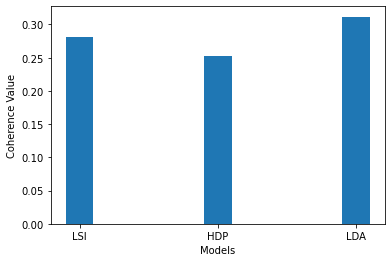

In [95]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence], ['LSI', 'HDP', 'LDA'])

In [96]:
hdp_coherence

0.25271284195920757

In [101]:
lda_coherence

0.31167737542777524

In [97]:
lsi_coherence

0.2812379795478372

In [98]:
ldatopics

[['one',
  'character',
  'end',
  'make',
  'captain',
  'scene',
  'hulk',
  'get',
  'much',
  'avenger'],
 ['see',
  'watch',
  'one',
  'hour',
  'end',
  'fan',
  'amazing',
  'much',
  'scene',
  'action'],
 ['watch',
  'character',
  'make',
  'would',
  'give',
  'see',
  'many',
  'get',
  'time',
  'end'],
 ['captain',
  'time',
  'one',
  'get',
  'back',
  'end',
  'see',
  'iron_man',
  'avenger',
  'stone'],
 ['make',
  'see',
  'get',
  'feel',
  'time',
  'one',
  'say',
  'know',
  'end',
  'character'],
 ['character',
  'great',
  'end',
  'well',
  'one',
  'infinity_war',
  'time',
  'make',
  'feel',
  'moment'],
 ['love',
  'ever',
  'see',
  'want',
  'make',
  'end',
  'great',
  'say',
  'one',
  'watch'],
 ['end',
  'perfect',
  'watch',
  'fan',
  'love',
  'make',
  'year',
  'one',
  'character',
  'every'],
 ['would',
  'one',
  'make',
  'thing',
  'see',
  'character',
  'time',
  'give',
  'well',
  'infinity_war'],
 ['see',
  'time',
  'get',
  'one',

In [102]:
lsitopics

[['one',
  'see',
  'character',
  'get',
  'time',
  'make',
  'end',
  'would',
  'well',
  'feel'],
 ['character',
  'get',
  'back',
  'time',
  'feel',
  'stone',
  'captain',
  'would',
  'time_travel',
  'story'],
 ['see',
  'character',
  'time_travel',
  'feel',
  'avenger',
  'infinity_war',
  'watch',
  'get',
  'have',
  'make'],
 ['character',
  'watch',
  'would',
  'make',
  'captain',
  'avenger',
  'time',
  'iron_man',
  'one',
  'see'],
 ['end',
  'one',
  'character',
  'get',
  'watch',
  'time',
  'great',
  'see',
  'make',
  'think'],
 ['one',
  'end',
  'see',
  'get',
  'would',
  'avenger',
  'time',
  'feel',
  'think',
  'watch'],
 ['make',
  'get',
  'would',
  'end',
  'watch',
  'one',
  'great',
  'feel',
  'captain',
  'time'],
 ['get',
  'avenger',
  'infinity_war',
  'character',
  'one',
  'captain',
  'scene',
  'well',
  'end',
  'make'],
 ['watch',
  'make',
  'would',
  'end',
  'one',
  'get',
  'avenger',
  'see',
  'infinity_war',
  'much'],


In [103]:
hdptopics

[['see',
  'one',
  'character',
  'end',
  'get',
  'time',
  'make',
  'well',
  'feel',
  'infinity_war',
  'avenger',
  'watch',
  'would',
  'great',
  'say',
  'scene',
  'much',
  'captain',
  'think',
  'way'],
 ['end',
  'see',
  'one',
  'character',
  'make',
  'time',
  'get',
  'watch',
  'well',
  'feel',
  'great',
  'infinity_war',
  'would',
  'avenger',
  'say',
  'much',
  'way',
  'give',
  'scene',
  'many'],
 ['end',
  'see',
  'make',
  'one',
  'watch',
  'get',
  'time',
  'character',
  'well',
  'great',
  'feel',
  'avenger',
  'infinity_war',
  'much',
  'say',
  'would',
  'give',
  'fan',
  'way',
  'love'],
 ['end',
  'see',
  'one',
  'make',
  'time',
  'character',
  'get',
  'well',
  'watch',
  'infinity_war',
  'avenger',
  'great',
  'captain',
  'would',
  'say',
  'way',
  'feel',
  'much',
  'love',
  'thing'],
 ['end',
  'time',
  'get',
  'one',
  'would',
  'character',
  'captain',
  'infinity_war',
  'watch',
  'great',
  'fight',
  'think

In [136]:
df.to_csv("checking.csv")